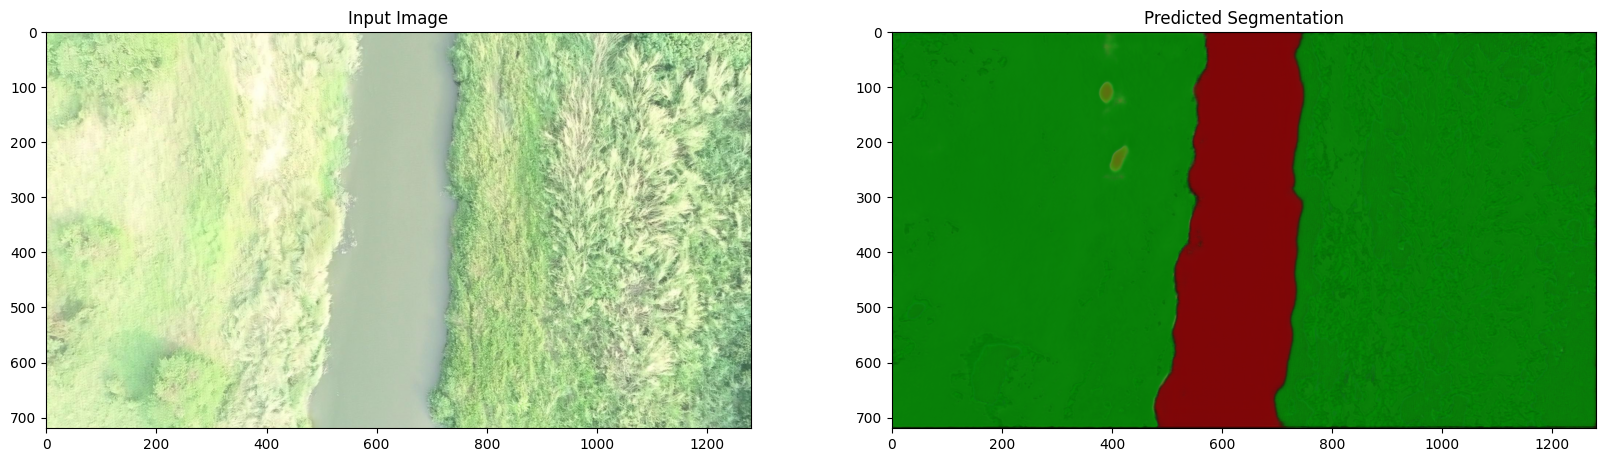

In [1]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from skimage.transform import resize
import numpy as np
import matplotlib.pyplot as plt

IMG_HEIGHT = 720
IMG_WIDTH = 1280
IMG_CHANNELS = 3


model_path = 'model.h5'
input_image_path = r'C:\Users\chest\OneDrive\project 3\input\train\images\IMG (14).jpg'

# 加載模型
loaded_model = load_model(model_path)

# 加載病癒處理圖像
input_img = load_img(input_image_path, color_mode="rgb")
input_img_array = img_to_array(input_img)
input_img_resized = resize(input_img_array, (IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), mode='constant', preserve_range=True)
input_img_normalized = input_img_resized / 255.0

# 疆域處理後的圖像擴展到包含一個批次的形狀
input_batch = np.expand_dims(input_img_normalized, axis=0)

# 使用加載的模型進行預測
predictions = loaded_model.predict(input_batch)

# 可視化預測結果
predicted_mask = predictions[0]

fig, ax = plt.subplots(1, 2, figsize=(20, 10))
ax[0].imshow(input_img_resized / 255.0)
ax[0].set_title('Input Image')

ax[1].imshow(predicted_mask.squeeze(), vmin=0, vmax=1)
ax[1].set_title('Predicted Segmentation')
plt.show()
